<a href="https://colab.research.google.com/github/Ahmed11Raza/Python-Projects/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinitializing the Python environment and regenerating the mock data:

**Step 1: Mock Data Generation**

I'll create a simulated dataset of product reviews with attributes like:

review_id: Unique identifier for each review.

review_text: Customer review text rating, A numerical score (e.g., 1-5 stars).

timestamp: A simulated timestamp for when the review was posted

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Mock Data Generation
def generate_mock_reviews(num_reviews=500):
    # Sample review texts
    positive_reviews = [
        "Excellent product, works as expected!",
        "Very happy with the purchase, highly recommend.",
        "Great value for the money, super satisfied.",
        "Top-notch quality, will buy again!",
        "Exceeded my expectations, amazing product!"
    ]
    negative_reviews = [
        "Terrible quality, stopped working in a week.",
        "Not worth the money, very disappointing.",
        "Poor customer service, won't buy again.",
        "Defective product, had to return it.",
        "Worst purchase ever, avoid this product!"
    ]
    neutral_reviews = [
        "It's okay, does the job but nothing special.",
        "Average quality, you get what you pay for.",
        "Mediocre experience, not too bad though.",
        "Not great, not terrible. Just fine.",
        "Fair product, but I expected more."
    ]

    # Combine review pools with corresponding sentiment labels
    review_pool = [(review, "positive") for review in positive_reviews] + \
                  [(review, "negative") for review in negative_reviews] + \
                  [(review, "neutral") for review in neutral_reviews]

    reviews = []
    for i in range(num_reviews):
        review_text, sentiment = random.choice(review_pool)
        # Generate a random star rating based on sentiment
        if sentiment == "positive":
            rating = random.randint(4, 5)
        elif sentiment == "negative":
            rating = random.randint(1, 2)
        else:
            rating = random.randint(3, 3)
        # Generate a random timestamp within the last year
        days_ago = random.randint(0, 365)
        timestamp = datetime.now() - timedelta(days=days_ago)

        reviews.append({
            "review_id": i + 1,
            "review_text": review_text,
            "rating": rating,
            "timestamp": timestamp.strftime("%Y-%m-%d %H:%M:%S")
        })

    return pd.DataFrame(reviews)

# Generate the dataset
mock_reviews = generate_mock_reviews(500)
mock_reviews.head()


,review_id,review_text,rating,timestamp
0,1,"It's okay, does the job but nothing special.",3,2024-02-13 11:01:28
1,2,"Not great, not terrible. Just fine.",3,2024-09-14 11:01:28
2,3,"Mediocre experience, not too bad though.",3,2024-08-14 11:01:28
3,4,"Poor customer service, won't buy again.",2,2024-08-24 11:01:28
4,5,"Worst purchase ever, avoid this product!",2,2024-03-09 11:01:28


**Step 2: Sentiment Analysis**

Use NLP techniques to analyze the sentiment of each review (e.g., positive, neutral, negative) using a library like TextBlob or VADER.
Categorize reviews based on sentiment scores.

**Step 3: Recurring Issues or Praises**

Perform topic modeling using NLP techniques such as Latent Dirichlet Allocation (LDA) to identify recurring themes.
Extract common phrases or keywords that signify issues or praises.


In [2]:
from textblob import TextBlob

# Sentiment Analysis
def analyze_sentiment(review):
    # Use TextBlob to compute polarity
    polarity = TextBlob(review).sentiment.polarity
    if polarity > 0.2:
        return "positive"
    elif polarity < -0.2:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis
mock_reviews["calculated_sentiment"] = mock_reviews["review_text"].apply(analyze_sentiment)

# Compare sentiment categories
sentiment_counts = mock_reviews["calculated_sentiment"].value_counts()
sentiment_counts


,count
calculated_sentiment,
positive,227
negative,171
neutral,102


**Step 4: Data Visualization**

Create visualizations to display:
Sentiment distribution across reviews.
Trends over time (e.g., how sentiment changes over months).
Most common keywords in positive and negative reviews.

<ipython-input-3-88244fa7ca5e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


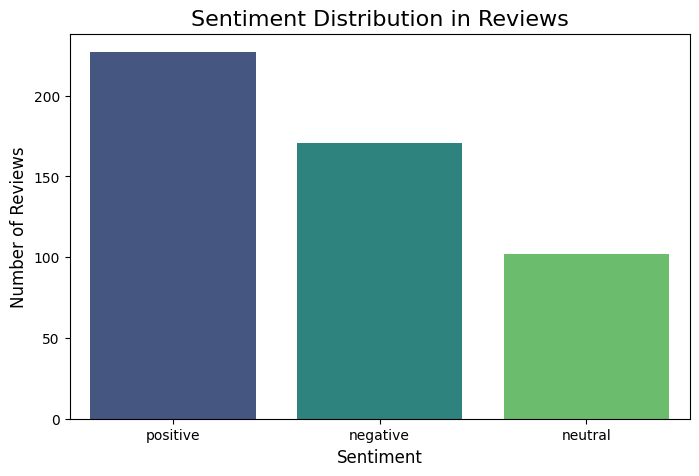

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution in Reviews", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
